# **Neural Networks using MNIST**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


### **Loading Dataset :-**

In [2]:
# 28 x 28 images of Handwritten digits 0-9
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

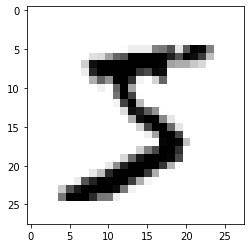

In [3]:
# print(x_train[0])
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

##### **Normalizing/Scaling the Data :-**

In [4]:
# The pixels vary from 0-255. Normalizing the images divides the data by 255.
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)


### **Building the Model :-**

In [5]:

# Sequential Model is a basic feed forward model
model = tf.keras.models.Sequential()

# Our images are 28 x 28 matrices. We can't use them as input unless its a Conv2D layer.
# We have to convert them into a 1D array using np.reshape() or Flatten() from tf.keras.layers()
# The first layer is going to be the input layer.

#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu,input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

# We have 2 hidden layer having 128 neurons each, a single layer would map our output to a linear NN.
# A neural network having 2 or more hidden layers is called Deep Neural Network.
# The activation function for output layer will be sigmoid since we want to output probabilities.



In [6]:
# Defining parameters for training of model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Training the Model :-**

In [9]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0305 - accuracy: 0.9899
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9939
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.009

### **Validating the Model :-**

In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9744
0.0910065770149231
0.974399983882904


### **Saving and Loading Model :-**

In [10]:
model.save('.\mnist.model')

INFO:tensorflow:Assets written to: .\mnist.model\assets


In [11]:
new_model = tf.keras.models.load_model('.\mnist.model')

### **Predictions :-**

In [12]:
predictions = new_model.predict(x_test)

(10000, 784)
6


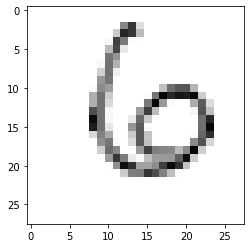

In [19]:
print(np.shape(x_test))

print(np.argmax(predictions[100]))
plt.imshow(x_test[100].reshape(28,28),cmap=plt.cm.binary)
plt.show()

In [21]:
print(np.shape(x_test[100].reshape(28,28)))

(28, 28)


### **RESULTS :-**

- On Training Data, Accuracy : 99.70 % and Loss : 0.92 % 
- On Validation Data, Accuracy : 97.44 % and Loss : 9.10 %
